### Test White Label Detector

In [1]:
import torch
import cv2
import glob
import random
import numpy as np
import time
import matplotlib.pyplot as plt

from white_label_detector import WhiteLabelDetector

%matplotlib inline

In [2]:
# globals
MODEL_LABELS_PATH = "/home/datascience/test_yolov5/weights/best_yolov5x_80ep.pt"

# to change the default confidence level (in yolo v5 is 0.25)
CONFIDENCE = 0.5

In [3]:
# utility to readf image from file
def read_image(path_name):
    img_orig = cv2.imread(path_name)

    # img from cv2 is BGR must change to RGB
    img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

    return img_rgb

In [4]:
# here we load the model... this must be called only once
# the first param is the path to the pt file containing the YOLO model
# the second param can be used to override the default confidence level (0.25) to
# reduce the # of false positive
# here I have set up confidence = 0.5
detector = WhiteLabelDetector(MODEL_LABELS_PATH, CONFIDENCE)

# to enable/disable BB visualization (default is False)
detector.SHOW = True

Using cache found in /home/datascience/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-25 Python-3.7.8 torch-1.10.0 CUDA:0 (Tesla P100-SXM2-16GB, 16281MiB)

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 1944x2592 1 label_bianca, 1 label_gialla
Speed: 3.2ms pre-process, 131.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


          xmin         ymin         xmax         ymax  confidence  class  \
0  1042.772949    59.857113  1682.157837   524.461060    0.852963      1   
1   987.949768  1145.062012  1886.124756  1700.959229    0.847579      0   

           name  
0  label_gialla  
1  label_bianca  


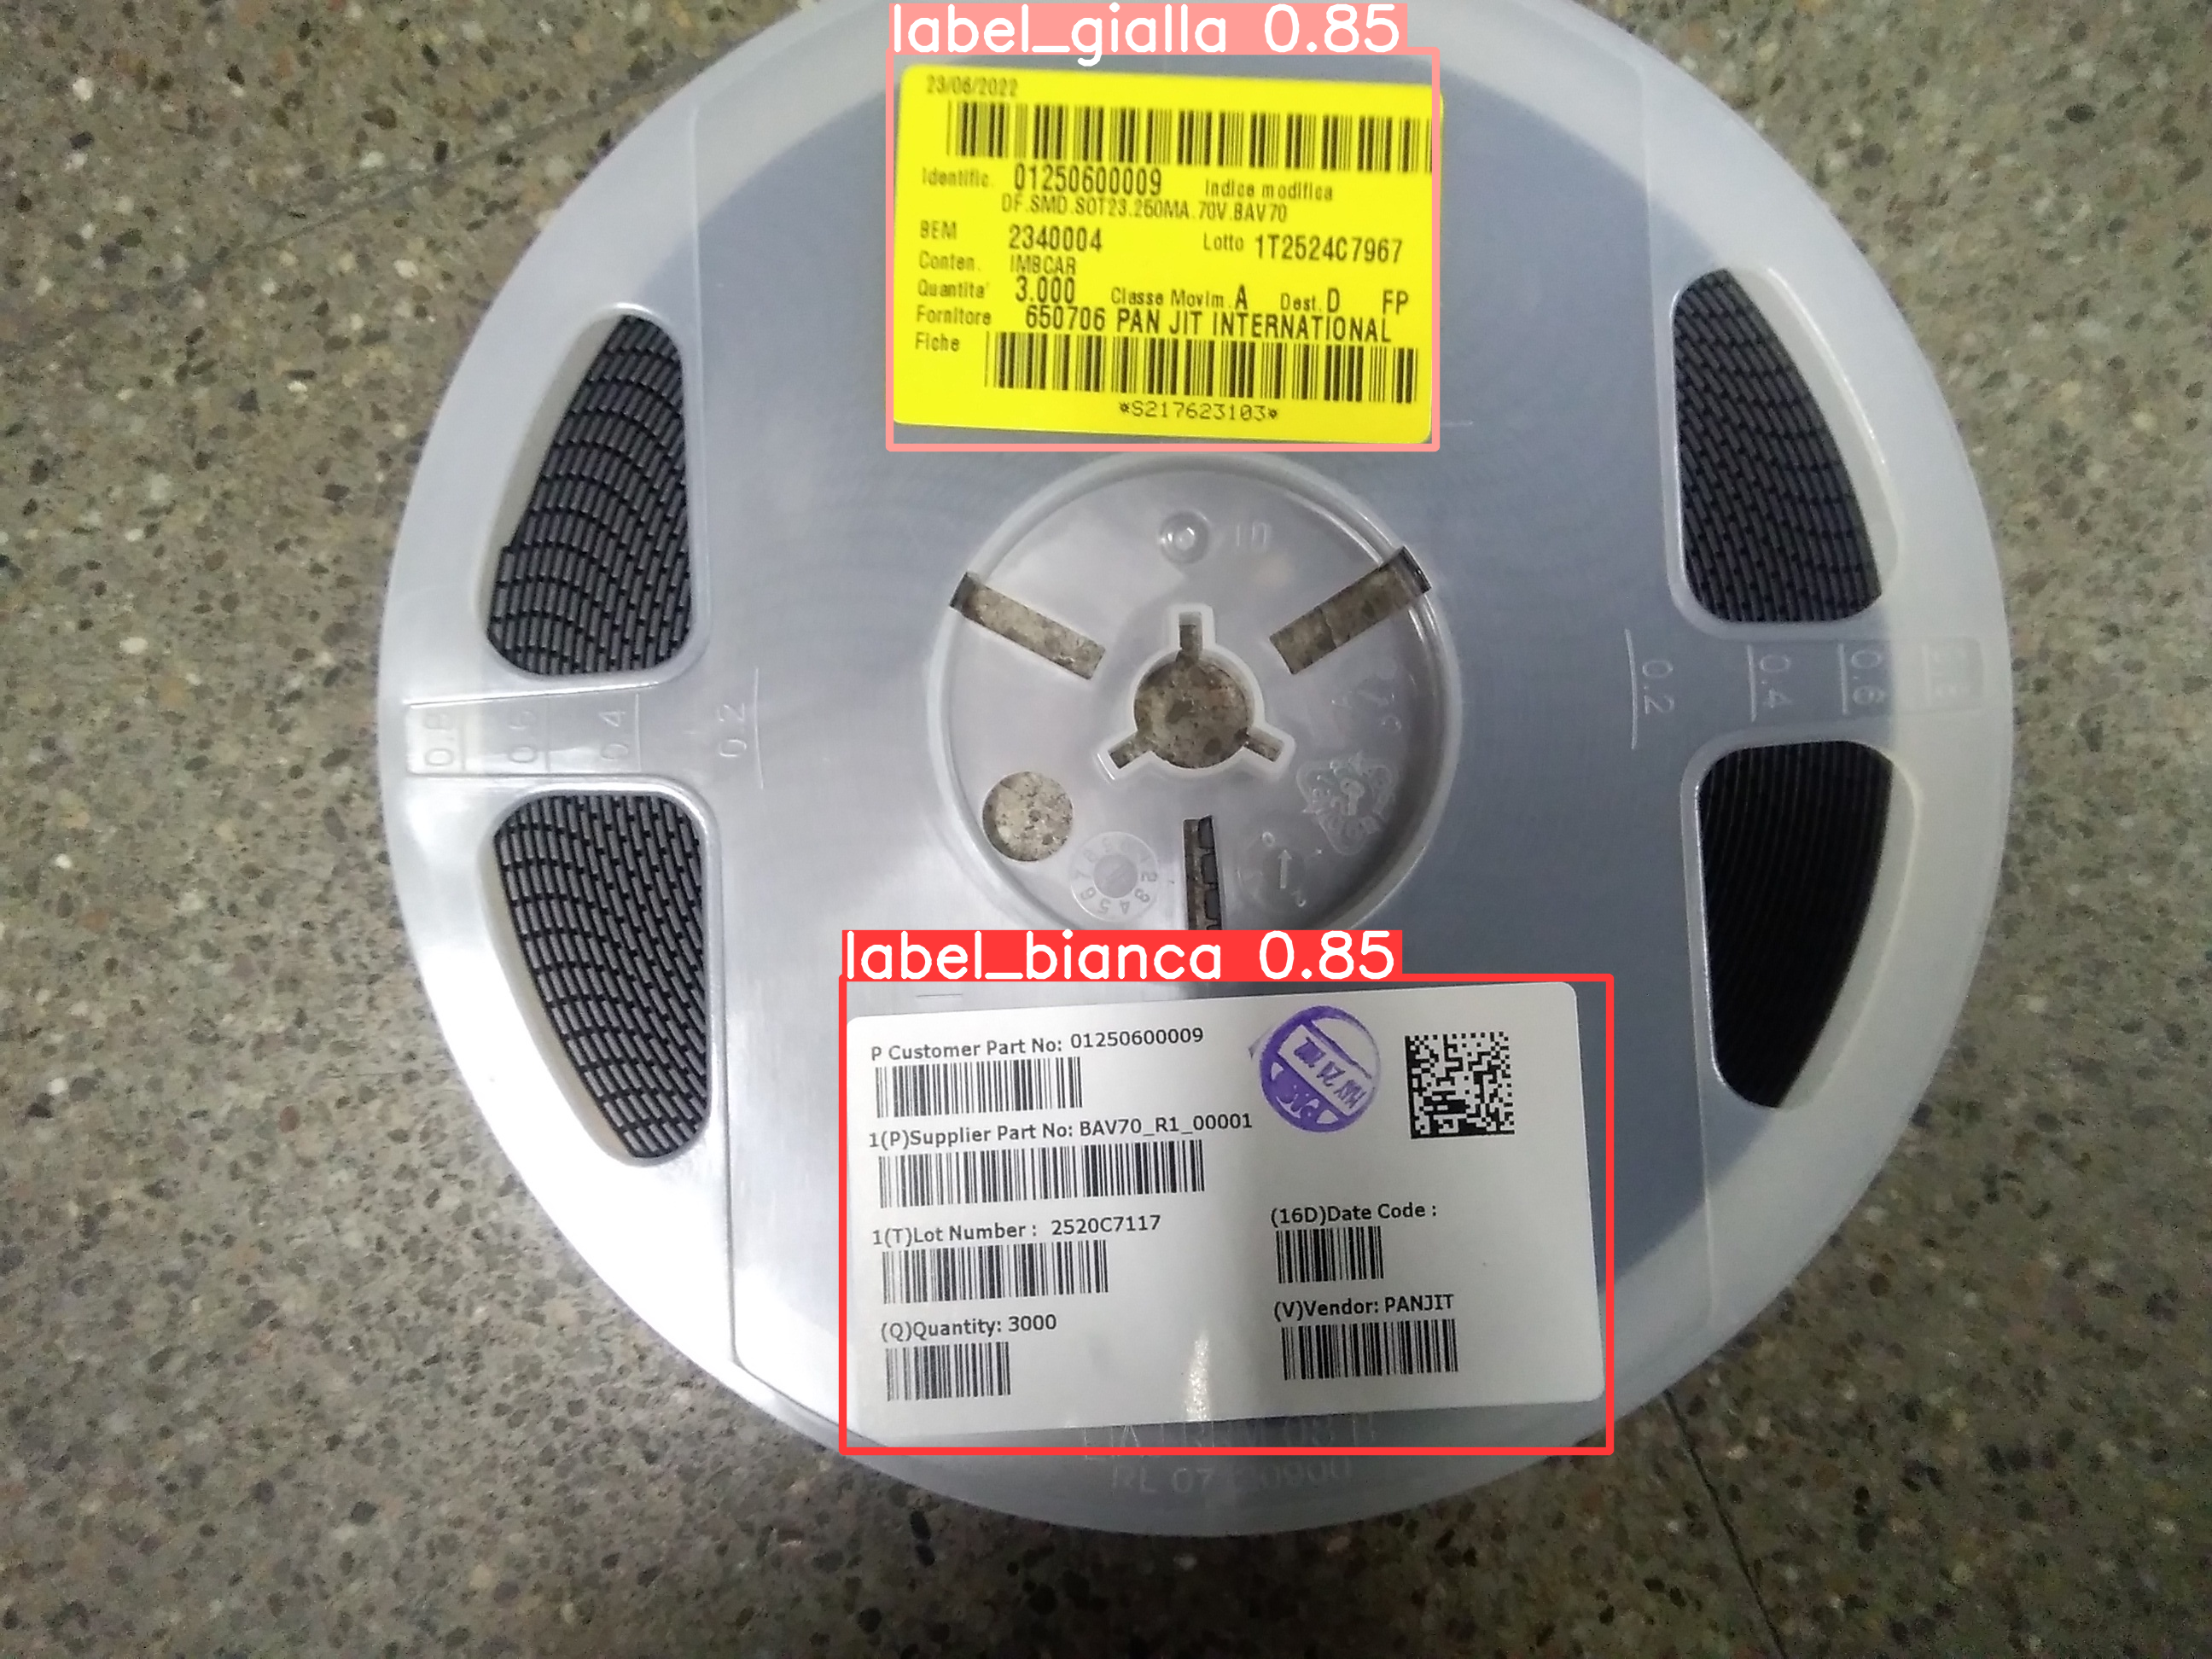

In [5]:
img1 = read_image("./img1.jpg")

boxes = detector.detect_white_labels(img1)

In [6]:
boxes

array([[987.9, 1145.1, 1886.1, 1701.0, 0.848, 0, 'label_bianca']], dtype=object)

image 1/1: 445x386 1 label_bianca
Speed: 2.8ms pre-process, 89.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 576)


        xmin       ymin        xmax        ymax  confidence  class  \
0  39.583778  43.509007  359.961945  387.581329    0.647334      0   

           name  
0  label_bianca  


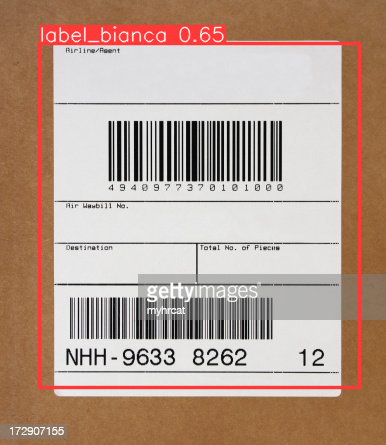

In [7]:
img2 = read_image("./img2.jpg")

boxes = detector.detect_white_labels(img2)

In [8]:
boxes

array([[39.6, 43.5, 360.0, 387.6, 0.647, 0, 'label_bianca']], dtype=object)